### HOMEWORK 3: OPTIMIZATION


Optimization via Gradient Descent

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial


In [3]:
# tolerance f e tolerance x are 2 stopping criteria
def check(k, kmax, grad_f, xk, xk_1, x0, tolf, tolx):
    c_tolf = np.linalg.norm(grad_f(xk))< tolf * np.linalg.norm(grad_f(x0))
    c_tolx = tolx > np.linalg.norm(xk - xk_1)
    return k >= kmax or c_tolx or c_tolf


In [4]:
# Backtracking
def backtracking(f, grad_f, x):
    """
    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k for which is found the value for alpha
    """
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x)) ** 2:
        alpha = tau * alpha
        
        if alpha < 1e-3:
            # too small, avoid long loops
            break
    return alpha

In [5]:
# GD without backtracking
def gradient_descent(f, grad_f, x0, kmax, tolf, tolx, alpha):

    x = [x0]
    k = 0
    condition = True

    while condition:
        
        x_n = x[k] - alpha * grad_f(x[k])
        k += 1
        condition = not check(k, kmax, grad_f, x_n, x[k-1], x[0], tolf, tolx)
        x.append(x_n)
        
    grads = [grad_f(xk) for xk in x]

    return x, k, [f(xk) for xk in x], grads, [np.linalg.norm(e) for e in grads]

    

In [6]:
# GD with backtracking
def GD_back(f, grad_f, x0, kmax, tolf, tolx):

    x = [x0]
    k = 0
    condition = True

    while condition:
        alpha = backtracking(f, grad_f, x[k])
        x_n = x[k] - alpha * grad_f(x[k])
        k += 1
        condition = not check(k, kmax, grad_f, x_n, x[k-1], x[0], tolf, tolx)
        x.append(x_n)
        
    grads = [grad_f(xk) for xk in x]

    return x, k, [f(xk) for xk in x], grads, [np.linalg.norm(e) for e in grads]

In [7]:
# function 1
def function_1(x):
    x1, x2 = x[0], x[1]
    return (x1 - 3)**2 + (x2 - 1)**2

def grad_1(x):
    x1, x2 = x[0], x[1]
    return np.array([2*(x1-3), 2*(x2-1)])

def func_1_for_contour(x, y):
    return (x-3)**2 + (y-1)**2

x1_true = np.array([3, 1])

In [8]:
# function 2
def function_2(x):
    x1, x2 = x[0], x[1]
    return 10*(x1-1)**2 + (x2-2)**2

def grad_2(x):
    x1, x2 = x[0], x[1]
    return np.array([20*(x1-1), 2*(x2-2)])

def func_2_for_contour(x, y):
    return 10*(x-1)**2 + (y-2)**2

x2_true = np.array([1, 2])

In [9]:
# function 3
# A matrice nxn
# per cui x è una colonna n x 1 per funzionare, il risultato sarà una colonna n x 1, quando faccio A@x - b avrò quindi un array colonna n x 1
# ricordo che b proviene da A @ x, b = A @ x-> la sottrazione dovrebbe dare 0
# poi la norma crea un valore in R

def function_3(x, A, b):
    return 0.5*np.linalg.norm(A @ x - b,2)**2

# chain rule calcolo la derivata della funzione rispetto a g e poi moltiplico rispetto a x
# df/dx = df/du * du/dx

# la derivata rispetto a u di ||u||^2 è uguale a 2u poichè la norma di u è u
# df/du   sostituisco A@x-b con u e quindi ho che 1/2*||u||^2 ->derivata rispetto a u -> u-> sostutuisco e ottengo A@x-b
# du/dx   ottengo solo A
# per cui ho Ax-b * A che è uguale a (A @ x - b) @ A.T
# A @ (A @ x - b) = (A @ x - b) @ A.T

def grad_3(x, A, b):
    return A.T @  (A @ x - b)


def get_A_b(n):
    x_true = np.ones(n)
    v = np.linspace(0, 1, n)
    A = np.vander(x=v)
    b = A @ x_true
    return A, b, x_true


In [10]:
# function 4
def function_4(x, A, b, l):
    return 0.5*np.linalg.norm(A @ x - b,2)**2 + l/2*np.linalg.norm(x,2)**2

def grad_4(x, A, b, l):
    return A.T @ (A @ x - b) + l * x

def get_A_b(n):
    x_true = np.ones(n)
    v = np.linspace(0, 1, n)
    A = np.vander(x=v)
    b = A @ x_true
    return A, b, x_true
    

In [11]:
def function_5(x):
    return x**4 + x**3 - 2*x**2 - 2*x

def grad_5(x):
    return 4*x**3 + 3*x**2 - 4*x - 2

### Testing

In [12]:
a_val = [0.1, 0.01, 0.001]
legend_labels = ['0.1', '0.01', '0.001', 'armijo']

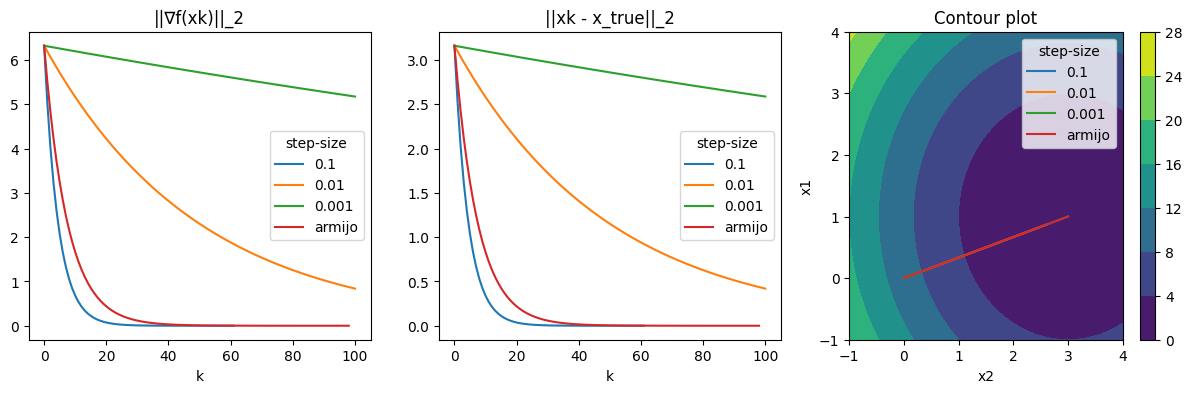

In [13]:
# Testing function_1

# ho un gradient len(grads) = 101 perchè ho anche x0

fig, axs = plt.subplots(1, 3, figsize=(15, 4))

for v in a_val:
    x, k, f_val, grads, err = gradient_descent(f=function_1, grad_f=grad_1, x0=np.zeros(2), kmax = 100, tolf=1e-6, tolx=1e-6, alpha = v)
    # plot the error vector that contains the ||∇f(xk)||2, to check that it goes to zero. Compare the convergence speed 
    # (in terms of the number of iterations k) in the different cases
    axs[0].plot([np.linalg.norm(g,2) for g in grads]) 
    # usando i valori delle norme (calcolate con np.linalg.norm) dei vettori g in grads come coordinate y. 
    # I valori x sono implicitamente considerati come gli indici dell'array risultante da np.linalg.norm(g) for g in grads.

    axs[1].plot([np.linalg.norm(xk - x1_true,2) for xk in x]) # plot the error ||xk − x∗||2 varying k when the true x∗ is available.
    axs[2].plot([xk[0] for xk in x], [xk[1] for xk in x])


# Backtracking
x_back, _, _, grads_back, _ = GD_back(f=function_1, grad_f=grad_1, x0=np.zeros(2), kmax=100, tolf=1e-6, tolx=1e-6)
axs[0].plot([np.linalg.norm(g, 2) for g in grads_back])
axs[1].plot([np.linalg.norm(xk - x1_true, 2) for xk in x_back])
axs[2].plot([xk[0] for xk in x_back], [xk[1] for xk in x_back])


axs[0].legend(legend_labels, title='step-size')
axs[1].legend(legend_labels, title='step-size')
axs[2].legend(legend_labels, title='step-size')

axs[0].set_title("||∇f(xk)||_2")
axs[0].set_xlabel("k")

axs[1].set_title("||xk - x_true||_2")
axs[1].set_xlabel("k")

axs[2].set_title("Contour plot")
axs[2].set_ylabel("x1")
axs[2].set_xlabel("x2")
xlist = np.linspace(-1.0, 4.0, 100)
ylist = np.linspace(-1.0, 4.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = func_1_for_contour(X, Y)
cp = axs[2].contourf(X, Y, Z)
fig.colorbar(cp)

plt.show()

    


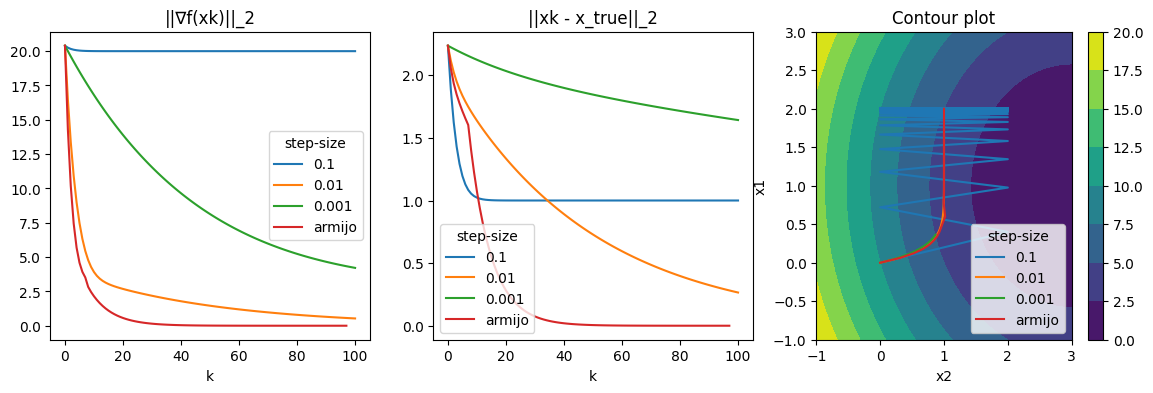

In [14]:
# Testing function_2

fig, axs = plt.subplots(1, 3, figsize=(14, 4))

for v in a_val:
    x, k, f_val, grads, err = gradient_descent(f=function_2, grad_f=grad_2, x0=np.zeros(2), kmax = 100, tolf=1e-6, tolx=1e-6, alpha = v)
    axs[0].plot([np.linalg.norm(g,2) for g in grads]) 
    axs[1].plot([np.linalg.norm(xk - x2_true,2) for xk in x]) 
    axs[2].plot([xk[0] for xk in x], [xk[1] for xk in x])

# Backtracking
x_back, _, _, grads_back, _ = GD_back(f=function_2, grad_f=grad_2, x0=np.zeros(2), kmax=100, tolf=1e-6, tolx=1e-6)
axs[0].plot([np.linalg.norm(g, 2) for g in grads_back])
axs[1].plot([np.linalg.norm(xk - x2_true, 2) for xk in x_back])
axs[2].plot([xk[0] for xk in x_back], [xk[1] for xk in x_back])

axs[0].legend(legend_labels, title='step-size')
axs[1].legend(legend_labels, title='step-size')
axs[2].legend(legend_labels, title='step-size')

axs[0].set_title("||∇f(xk)||_2")
axs[0].set_xlabel("k")

axs[1].set_title("||xk - x_true||_2")
axs[1].set_xlabel("k")

axs[2].set_title("Contour plot")
axs[2].set_ylabel("x1")
axs[2].set_xlabel("x2")

xlist = np.linspace(-1.0, 3.0, 100)
ylist = np.linspace(-1.0, 3.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = func_1_for_contour(X, Y)
cp = axs[2].contourf(X, Y, Z)
fig.colorbar(cp)

plt.show()


alfha = 0.1 creates an overshootig, the alpha value is too big and the observed behaviour is a bouncing.
The algorithm never reaches the minimum

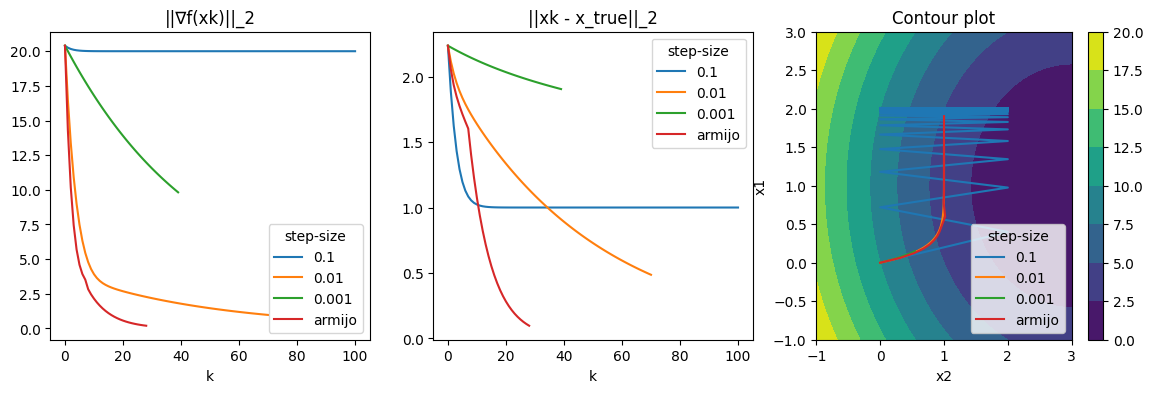

In [15]:
# Testing function_2 with different value for tolerance

fig, axs = plt.subplots(1, 3, figsize=(14, 4))

for v in a_val:
    x, k, f_val, grads, err = gradient_descent(f=function_2, grad_f=grad_2, x0=np.zeros(2), kmax = 100, tolf=1e-2, tolx=1e-2, alpha = v)
    axs[0].plot([np.linalg.norm(g,2) for g in grads]) 
    axs[1].plot([np.linalg.norm(xk - x2_true,2) for xk in x]) 
    axs[2].plot([xk[0] for xk in x], [xk[1] for xk in x])

# Backtracking
x_back, _, _, grads_back, _ = GD_back(f=function_2, grad_f=grad_2, x0=np.zeros(2), kmax=100, tolf=1e-2, tolx=1e-2)
axs[0].plot([np.linalg.norm(g, 2) for g in grads_back])
axs[1].plot([np.linalg.norm(xk - x2_true, 2) for xk in x_back])
axs[2].plot([xk[0] for xk in x_back], [xk[1] for xk in x_back])

axs[0].legend(legend_labels, title='step-size')
axs[1].legend(legend_labels, title='step-size')
axs[2].legend(legend_labels, title='step-size')

axs[0].set_title("||∇f(xk)||_2")
axs[0].set_xlabel("k")

axs[1].set_title("||xk - x_true||_2")
axs[1].set_xlabel("k")

axs[2].set_title("Contour plot")
axs[2].set_ylabel("x1")
axs[2].set_xlabel("x2")

xlist = np.linspace(-1.0, 3.0, 100)
ylist = np.linspace(-1.0, 3.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = func_1_for_contour(X, Y)
cp = axs[2].contourf(X, Y, Z)
fig.colorbar(cp)

plt.show()


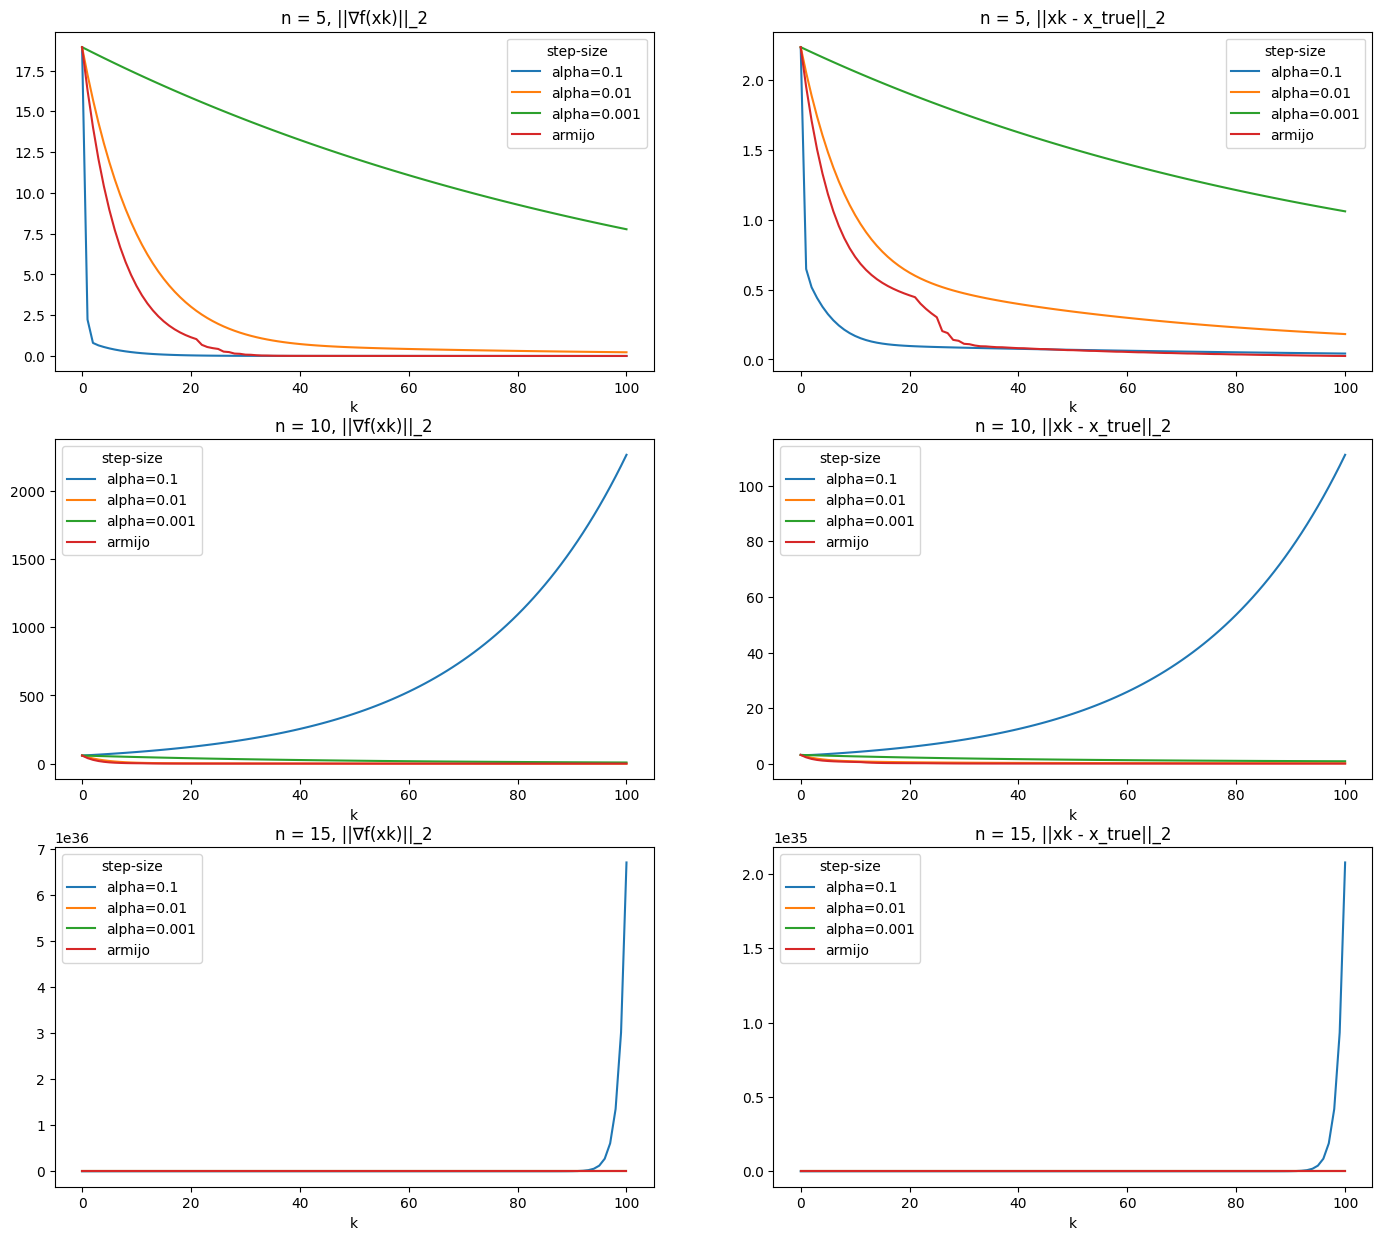

In [16]:
# Testing function_3

n_values = [5, 10, 15]

fig, axs = plt.subplots(len(n_values), 2, figsize=(17, 15))

for i, n in enumerate(n_values):

    A, b, x_true = get_A_b(n)

    partial_f3 = partial(function_3, A=A, b=b)
    partial_grad3 = partial(grad_3, A=A, b=b)

    for v in a_val:
        x, k, f_val, grads, err = gradient_descent(f=partial_f3, grad_f=partial_grad3, x0=np.zeros(n), kmax=100, tolf=1e-6, tolx=1e-6, alpha=v)
        
        axs[i][0].plot([np.linalg.norm(g,2) for g in grads], label=f'alpha={v}')
        axs[i][1].plot([np.linalg.norm(xk - x_true,2) for xk in x], label=f'alpha={v}')
    
    x_back, _, _, grads_back, _ = GD_back(f=partial_f3, grad_f=partial_grad3, x0=np.zeros(n), kmax=100, tolf=1e-6, tolx=1e-6)
    axs[i][0].plot([np.linalg.norm(g, 2) for g in grads_back], label='armijo')
    axs[i][1].plot([np.linalg.norm(xk - x_true, 2) for xk in x_back], label='armijo')

    axs[i][0].legend(title='step-size')
    axs[i][1].legend(title='step-size')

    axs[i][0].set_title(f"n = {n}, ||∇f(xk)||_2")
    axs[i][0].set_xlabel("k")

    axs[i][1].set_title(f"n = {n}, ||xk - x_true||_2")
    axs[i][1].set_xlabel("k")

plt.show()


    

with alpha = 0.1 the solution never converges if the n becomes too big

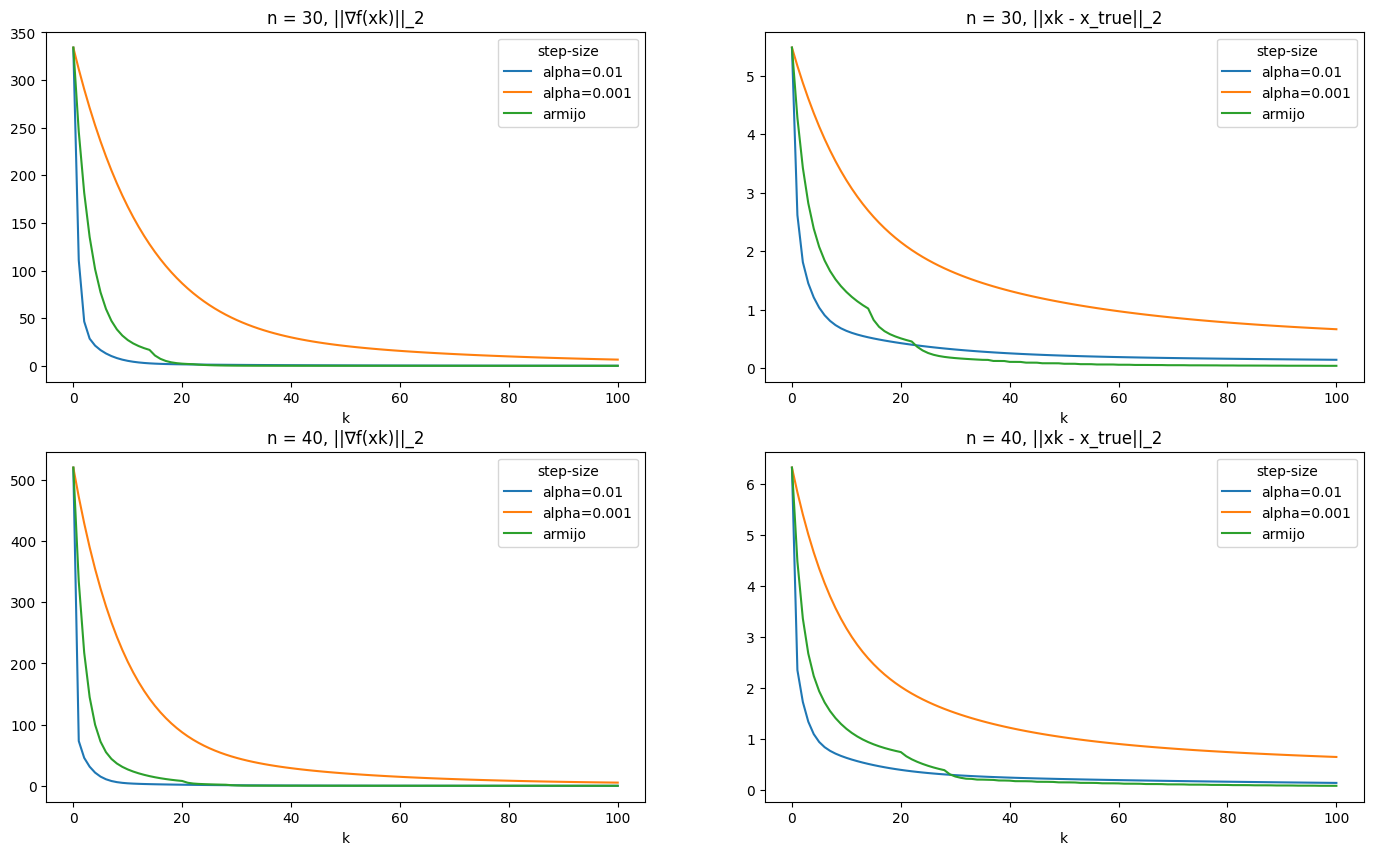

In [17]:
# Zoom-in
n_values = [30, 40]
a_val = [0.01, 0.001]

fig, axs = plt.subplots(len(n_values), 2, figsize=(17, 10))

for i, n in enumerate(n_values):

    A, b, x_true = get_A_b(n)

    partial_f3 = partial(function_3, A=A, b=b)
    partial_grad3 = partial(grad_3, A=A, b=b)

    for v in a_val:
        x, k, f_val, grads, err = gradient_descent(f=partial_f3, grad_f=partial_grad3, x0=np.zeros(n), kmax=100, tolf=1e-6, tolx=1e-6, alpha=v)
        
        axs[i][0].plot([np.linalg.norm(g,2) for g in grads], label=f'alpha={v}')
        axs[i][1].plot([np.linalg.norm(xk - x_true,2) for xk in x], label=f'alpha={v}')
    
    x_back, _, _, grads_back, _ = GD_back(f=partial_f3, grad_f=partial_grad3, x0=np.zeros(n), kmax=100, tolf=1e-6, tolx=1e-6)
    axs[i][0].plot([np.linalg.norm(g, 2) for g in grads_back], label='armijo')
    axs[i][1].plot([np.linalg.norm(xk - x_true, 2) for xk in x_back], label='armijo')

    axs[i][0].legend(title='step-size')
    axs[i][1].legend(title='step-size')

    axs[i][0].set_title(f"n = {n}, ||∇f(xk)||_2")
    axs[i][0].set_xlabel("k")

    axs[i][1].set_title(f"n = {n}, ||xk - x_true||_2")
    axs[i][1].set_xlabel("k")

plt.show()

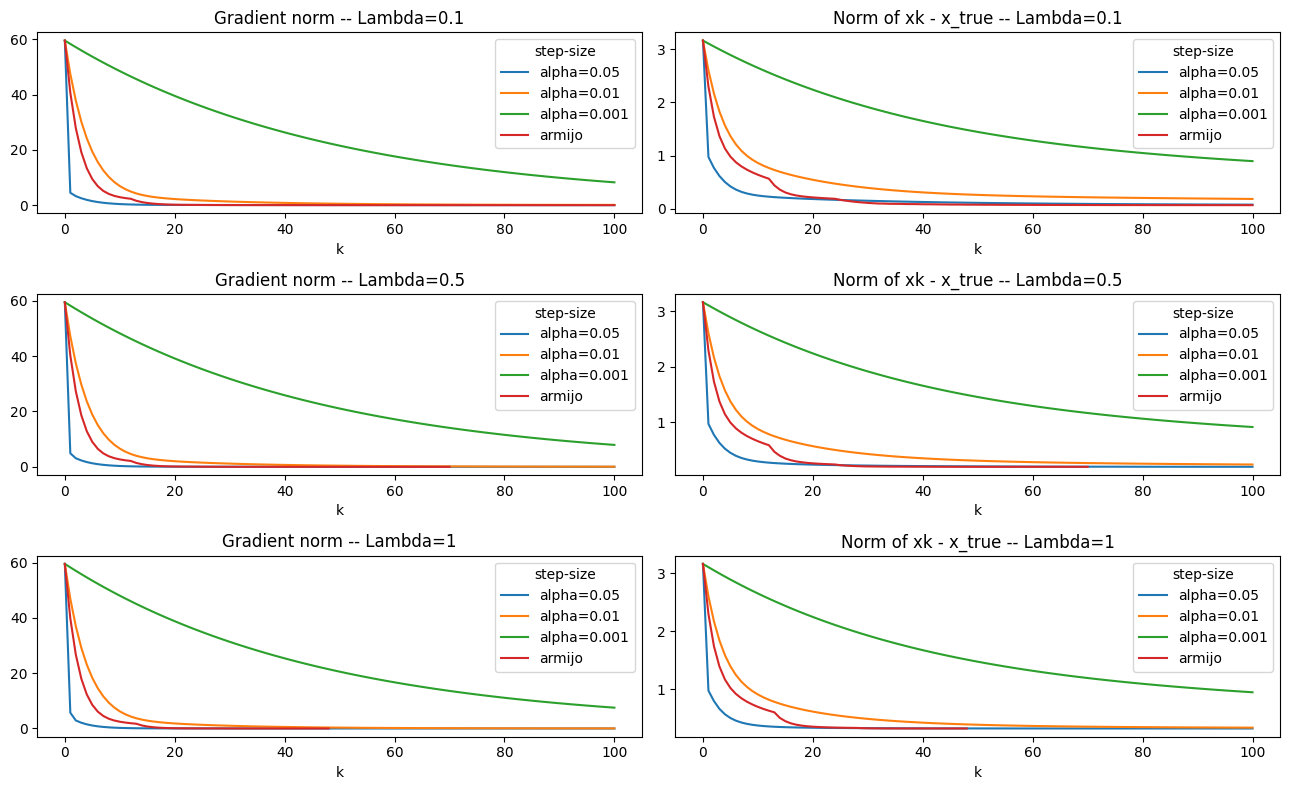

In [18]:
# Testing function_4
a_val = [0.05, 0.01, 0.001]
lambda_values = [0.1, 0.5, 1]
n = 10

fig, axs = plt.subplots(3, 2, figsize=(13, 8))

for i, l in enumerate(lambda_values):
    A, b, x_true = get_A_b(n)
    partial_f4 = partial(function_4, A=A, b=b, l=l)
    partial_grad4 = partial(grad_4, A=A, b=b, l=l)

    for v in a_val:
        x, k, f_val, grads, err = gradient_descent(f=partial_f4, grad_f=partial_grad4, x0=np.zeros(n), kmax=100, tolf=1e-6, tolx=1e-6, alpha=v)
        axs[i, 0].plot([np.linalg.norm(g, 2) for g in grads], label=f'alpha={v}')
        axs[i, 1].plot([np.linalg.norm(xk - x_true, 2) for xk in x], label=f'alpha={v}')
    
    x_back, _, _, grads_back, _ = GD_back(f=partial_f4, grad_f=partial_grad4, x0=np.zeros(n), kmax=100, tolf=1e-6, tolx=1e-6)
    axs[i, 0].plot([np.linalg.norm(g, 2) for g in grads_back], label='armijo')
    axs[i, 1].plot([np.linalg.norm(xk - x_true, 2) for xk in x_back], label='armijo')

    axs[i, 0].legend(title='step-size')
    axs[i, 0].set_title(f"Gradient norm -- Lambda={l}")
    axs[i, 0].set_xlabel("k")

    axs[i, 1].legend(title='step-size')
    axs[i, 1].set_title(f"Norm of xk - x_true -- Lambda={l}")
    axs[i, 1].set_xlabel("k")

plt.tight_layout()
plt.show()


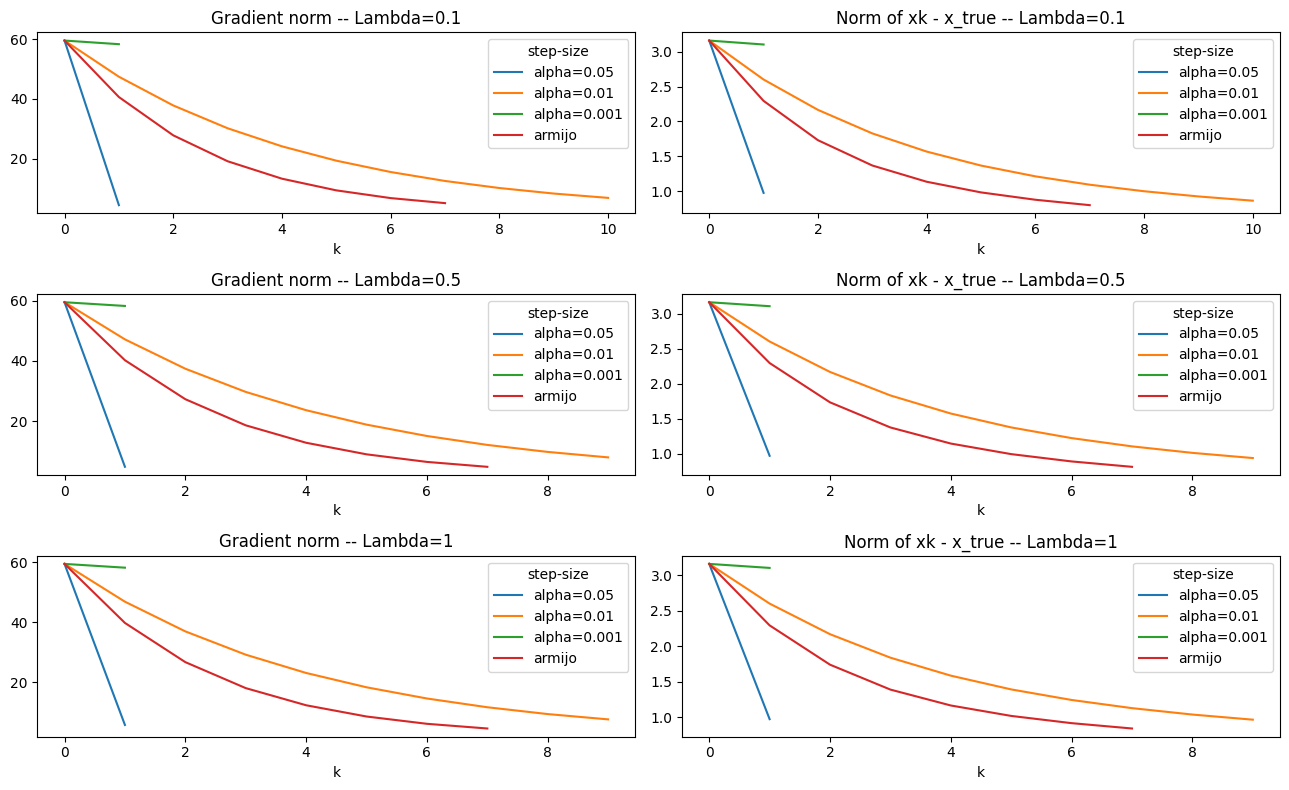

In [19]:
# Testing function_4 changing the value for tolx and tolf
a_val = [0.05, 0.01, 0.001]
lambda_values = [0.1, 0.5, 1]
n = 10

fig, axs = plt.subplots(3, 2, figsize=(13, 8))

for i, l in enumerate(lambda_values):
    A, b, x_true = get_A_b(n)
    partial_f4 = partial(function_4, A=A, b=b, l=l)
    partial_grad4 = partial(grad_4, A=A, b=b, l=l)

    for v in a_val:
        x, k, f_val, grads, err = gradient_descent(f=partial_f4, grad_f=partial_grad4, x0=np.zeros(n), kmax=100, tolf=1e-1, tolx=1e-1, alpha=v)
        axs[i, 0].plot([np.linalg.norm(g, 2) for g in grads], label=f'alpha={v}')
        axs[i, 1].plot([np.linalg.norm(xk - x_true, 2) for xk in x], label=f'alpha={v}')
    
    x_back, _, _, grads_back, _ = GD_back(f=partial_f4, grad_f=partial_grad4, x0=np.zeros(n), kmax=100, tolf=1e-1, tolx=1e-1)
    axs[i, 0].plot([np.linalg.norm(g, 2) for g in grads_back], label='armijo')
    axs[i, 1].plot([np.linalg.norm(xk - x_true, 2) for xk in x_back], label='armijo')

    axs[i, 0].legend(title='step-size')
    axs[i, 0].set_title(f"Gradient norm -- Lambda={l}")
    axs[i, 0].set_xlabel("k")

    axs[i, 1].legend(title='step-size')
    axs[i, 1].set_title(f"Norm of xk - x_true -- Lambda={l}")
    axs[i, 1].set_xlabel("k")

plt.tight_layout()
plt.show()


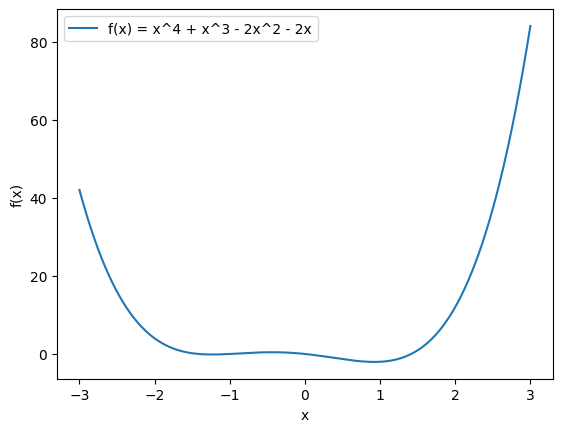

In [20]:
x_values = np.linspace(-3, 3, 1000)
y_values = function_5(x_values)
plt.plot(x_values, y_values, label='f(x) = x^4 + x^3 - 2x^2 - 2x')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

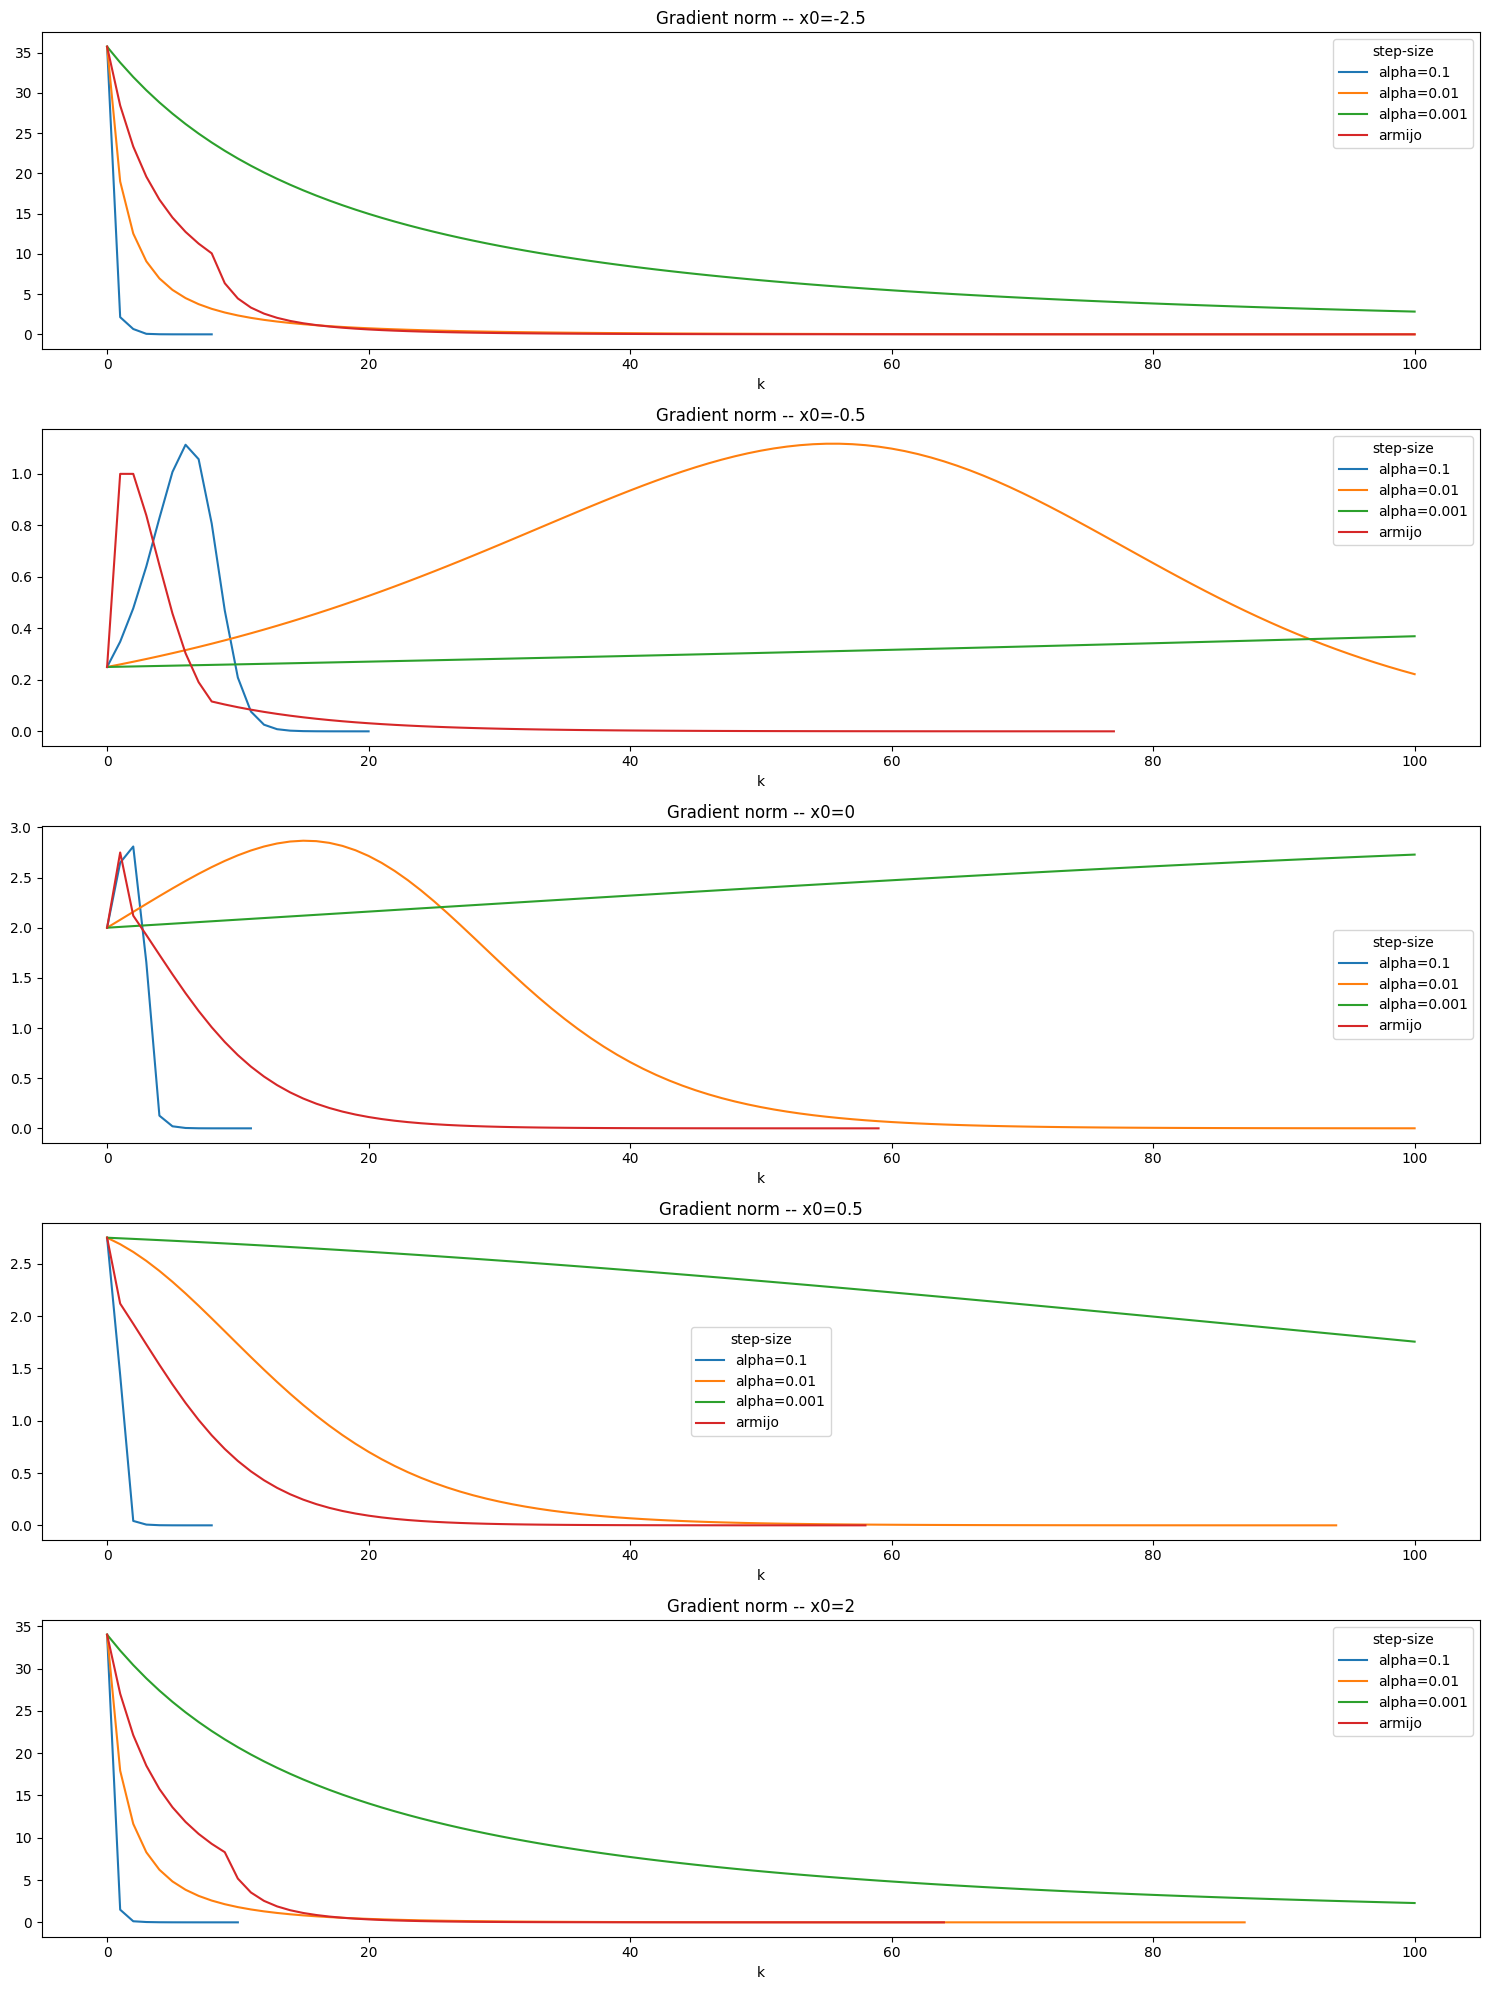

In [21]:
# Testing function_5
a_val = [0.1, 0.01, 0.001]
starting_points = [-2.5, -0.5, 0, 0.5, 2]

fig, axs = plt.subplots(5, 1, figsize=(15, 20))

for i, sp in enumerate(starting_points):
    for v in a_val:
        x, k, f_val, grads, err = gradient_descent(f=function_5, grad_f=grad_5, x0=sp, kmax=100, tolf=1e-6, tolx=1e-6, alpha=v)
        axs[i].plot([np.linalg.norm(g) for g in grads], label=f'alpha={v}')
    
    _, _, _, grads_back, _ = GD_back(f=function_5, grad_f=grad_5, x0=sp, kmax=100, tolf=1e-6, tolx=1e-6)
    axs[i].plot([np.linalg.norm(g) for g in grads_back], label='armijo')

    axs[i].legend(title='step-size')
    axs[i].set_title(f"Gradient norm -- x0={sp}")
    axs[i].set_xlabel("k")

plt.tight_layout()
plt.show()

I can see that using a starting point like -0.5 or less will bring me to the local minimum.
using a starting point like 2 or 0.5 will bring me to the global maximum

### Optimization via Stochastic Gradient Descent

In [60]:
import pandas as pd
np.random.seed(42)

In [61]:
data = pd.read_csv('data.csv')

In [62]:
print("Shape of data {}".format(data.shape))

Shape of data (42000, 785)


In [63]:
def get_data_from_index(X, Y, indeces):
    d1 = indeces[0]
    d2 = indeces[1]
    idx = np.where((Y[:]==d1) | (Y[:]==d2))[0]

    X = X[:, idx]  
    Y = Y[idx]
    return X, Y

def train_test_split(X, Y, N_train):
    N = X.shape[1]
    idx = np.arange(N)
    np.random.shuffle(idx)
    train_idx = idx[:N_train]
    test_idx = idx[N_train:]
    X_train = X[:, train_idx]  
    Y_train = Y[train_idx]
    X_test = X[:, test_idx]
    Y_test = Y[test_idx]

    return (X_train, Y_train), (X_test, Y_test)

In [64]:
def get_data(data, indeces, N_train):
    data_copied = np.array(data)
    X = data_copied[:, 1:]
    X = X.T
    Y = data_copied[:, 0]
    d, N = X.shape
    X_hat = np.concatenate((np.ones((1,N)), X), axis=0) #for logistic

    X_hat, Y = get_data_from_index(X_hat, Y, indeces)
    _, N = X_hat.shape

    (X_train, Y_train), (X_test, Y_test) = train_test_split(X_hat, Y, N_train) #X_hat for logistic
    
    Y_train = np.array(list(map(lambda x: 0 if x==indeces[0] else 1, Y_train)))
    Y_test = np.array(list(map(lambda x:  0 if x==indeces[0] else 1, Y_test)))
    
    return X_train, Y_train, X_test, Y_test

In [65]:
indeces = [5, 6]
N_train = 4000

X_train, Y_train, X_test, Y_test = get_data(data, indeces, N_train)

d, N = X_train.shape

print(N,d)

4000 785


In [66]:
import warnings

#suppress warnings
warnings.filterwarnings('ignore')

def sigmoid(x):
    # returns an array for example 512 with every component calculated
    return 1/(1+np.exp(-x))

def model(w, x_hat):
    # EXAMPLE x_hat.T @ w has shape (512,) an array that stores the linear combination between the weights and the data train
    return sigmoid(x_hat.T @ w)

# MSE
def loss_func(w, x_hat, y, model):
    return np.linalg.norm(model(w, x_hat)-y)**2/(2*len(y))

def grad_func(w, x_hat, y, model):
    func_value = model(w, x_hat)
    return x_hat @ (func_value * (1-func_value) * (func_value - y))/(len(y))

def predict(w, x, model, treshold=0.5):
    results = model(w, x)
    return np.array([1 if r>=treshold else 0 for r in results])

In [67]:
def check(k, kmax, grad_f, wk, wk_1, w0, data, model, tolf=1e-6, tolx=1e-6):
    X, Y = data
    c_tolf = np.linalg.norm(grad_f(wk, X, Y, model))< tolf * np.linalg.norm(grad_f(w0, X, Y, model))
    c_tolx = tolx > np.linalg.norm(wk - wk_1)
    return k >= kmax or c_tolx or c_tolf

In [30]:
# Backtracking
def backtracking(f, grad_f, w, model, data):
    X, Y = data
    alpha = 1
    c = 0.8
    tau = 0.25
    t = w - alpha * grad_f(w, X, Y, model)
    while f(t, X, Y, model) > f(w, X, Y, model) - c * alpha * np.linalg.norm(grad_f(w, X, Y, model)) ** 2:
        alpha = tau * alpha
        if alpha < 1e-3:
            break
    return alpha

In [31]:
def GD_back(loss_func, grad_func, model, w0, data, kmax = 100):

    X, Y = data
    w = [w0]
    k = 0
    condition = True

    while condition:
        alpha = backtracking(loss_func, grad_func, w[k], model, data)
        w_n = w[k] - alpha * grad_func(w[k], X, Y, model)
        k += 1
        condition = not check(k, kmax, grad_func, w_n, w[k-1], w[0], data, model)
        w.append(w_n)
        
    grads = [grad_func(wk, X, Y, model) for wk in w]

    return w, k, [loss_func(wk, X, Y, model) for wk in w], grads, [np.linalg.norm(e) for e in grads]

In [32]:
def SGD(loss_func, grad_func, model, w0, data, batch_size, n_epochs):

    alpha = 1e-5
    X, Y = data
    w = [w0]
    loss_val = []
    grads_val = []
    err_val = []

    for n in range(n_epochs):
        # every epoch X and Y are shuffled because then we can keep a batch_size of the X shuffled
        indeces = np.arange(len(Y))
        np.random.shuffle(indeces)
        X = X[:,indeces]
        Y = Y[indeces]
        
        # batch iteration
        for i in range(0, len(Y), batch_size):
            batch_X = X[:,i:i+batch_size]
            batch_Y = Y[i:i+batch_size]
            w_n = w[-1] - alpha*grad_func(w[-1], batch_X, batch_Y, model)
            w.append(w_n)
            
        loss_val.append(loss_func(w[-1], X, Y, model))
        grads_val.append(grad_func(w[-1], X, Y, model))
        err_val.append(np.linalg.norm(grads_val[-1]))
    
    return w, loss_val, grads_val, err_val

In [72]:
w, loss_val, grads_val, err_val = SGD(loss_func, grad_func, model, np.ones(d)*1e-5, (X_train, Y_train), 400, 200)

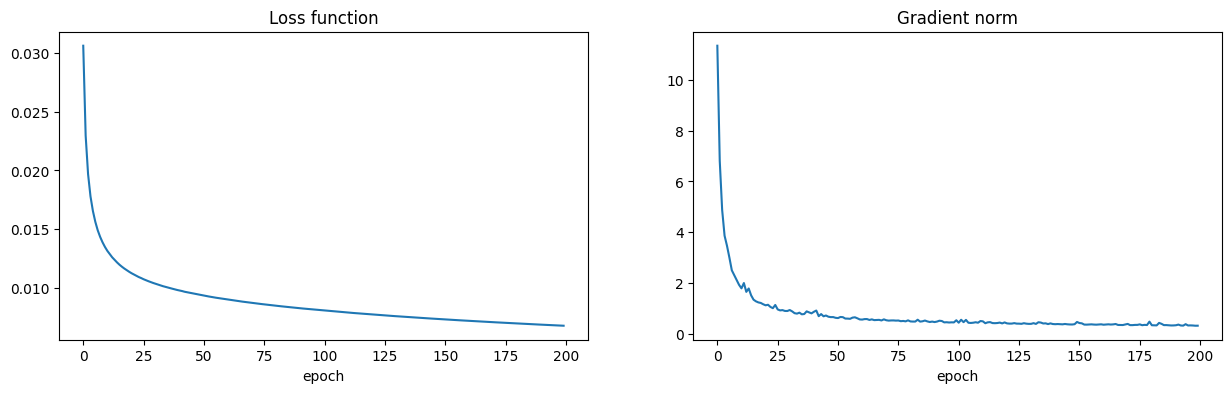

In [71]:
_, axs = plt.subplots(1, 2, figsize=(15, 4))

axs[0].plot(loss_val)
axs[0].set_title("Loss function")
axs[0].set_xlabel("epoch")

axs[1].plot(err_val)
axs[1].set_title("Gradient norm")
axs[1].set_xlabel("epoch")

plt.show()

In [35]:
accuracy = np.mean([predict(w[-1], X_test, model)==Y_test])
print("Accuracy of the logistic regression classifier: {:.2f}%".format(accuracy*100))

Accuracy of the logistic regression classifier: 95.28%


In [36]:
# Test the classificator for different digits
value_list = [
    {"digits":[0, 1], "N_train": 4000, "legend":"[0, 1] - 4000"},
    {"digits":[2, 3], "N_train": 4000, "legend":"[2, 3] - 4000"},
    {"digits":[4, 5], "N_train": 4000, "legend":"[4, 5] - 4000"},
    {"digits":[6, 7], "N_train": 4000, "legend":"[6, 7] - 4000"},
    {"digits":[8, 9], "N_train": 4000, "legend":"[8, 9] - 4000"},
]

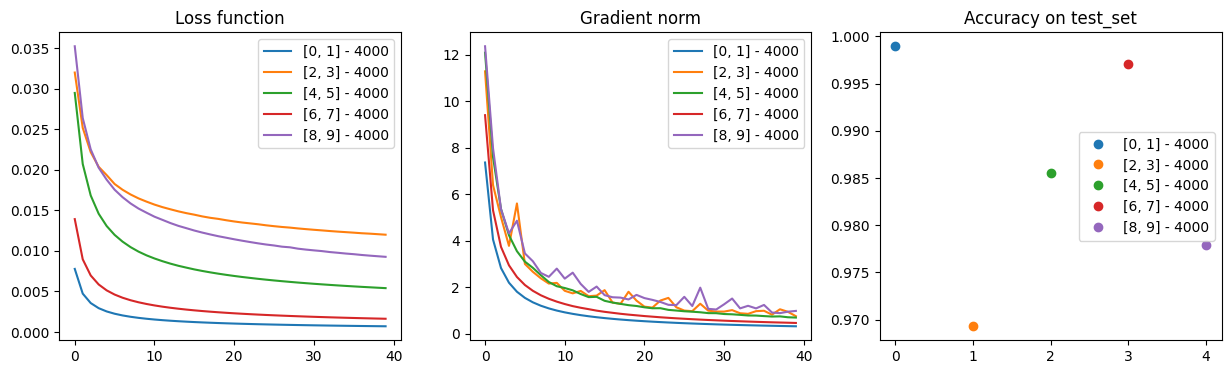

In [37]:
_, axs = plt.subplots(1, 3, figsize=(15, 4))

for i, value in enumerate(value_list):
    X_train, Y_train, X_test, Y_test = get_data(data, value["digits"], value["N_train"])
    w, loss_val, grads_val, err_val = SGD(loss_func, grad_func, model, np.ones(d)*1e-5, (X_train, Y_train), 400, 40)
    accuracy = np.mean([predict(w[-1], X_test, model)==Y_test])

    axs[0].plot(loss_val)
    axs[1].plot(err_val)
    axs[2].plot(i, accuracy, "o")

axs[0].set_title("Loss function")
axs[0].legend([v["legend"] for v in value_list])
axs[1].set_title("Gradient norm")
axs[1].legend([v["legend"] for v in value_list])
axs[2].set_title("Accuracy on test_set")
axs[2].legend([v["legend"] for v in value_list])

plt.show()

In [38]:
value_list = [
    {"digits":[6, 7], "N_train": 500, "legend":"[6, 7] - 500"},
    {"digits":[6, 7], "N_train": 1000, "legend":"[6, 7] - 1000"},
    {"digits":[6, 7], "N_train": 2000, "legend":"[6, 7] - 2000"},
    {"digits":[6, 7], "N_train": 4000, "legend":"[6, 7] - 4000"},
    {"digits":[6, 7], "N_train": 6000, "legend":"[6, 7] - 6000"},
    {"digits":[6, 7], "N_train": 8000, "legend":"[6, 7] - 8000"},
]

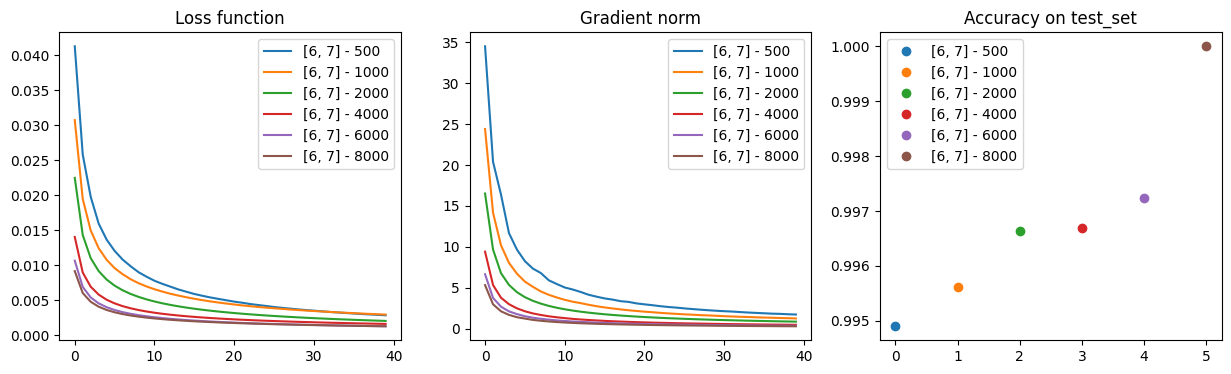

In [39]:
_, axs = plt.subplots(1, 3, figsize=(15, 4))

for i, value in enumerate(value_list):
    X_train, Y_train, X_test, Y_test = get_data(data, value["digits"], value["N_train"])
    w, loss_val, grads_val, err_val = SGD(loss_func, grad_func, model, np.ones(d)*1e-5, (X_train, Y_train), 400, 40)
    accuracy = np.mean([predict(w[-1], X_test, model)==Y_test])

    axs[0].plot(loss_val)
    axs[1].plot(err_val)
    axs[2].plot(i, accuracy, "o")

axs[0].set_title("Loss function")
axs[0].legend([v["legend"] for v in value_list])
axs[1].set_title("Gradient norm")
axs[1].legend([v["legend"] for v in value_list])
axs[2].set_title("Accuracy on test_set")
axs[2].legend([v["legend"] for v in value_list])

plt.show()

In [40]:
value_list = {
    (4, 6): [
        {"digits": [4, 6], "N_train": 1000, "legend": "1000"},
        {"digits": [4, 6], "N_train": 4000, "legend": "4000"},
        {"digits": [4, 6], "N_train": 8000, "legend": "8000"},
    ],
    (1, 3): [
        {"digits": [1, 3], "N_train": 1000, "legend": "1000"},
        {"digits": [1, 3], "N_train": 4000, "legend": "4000"},
        {"digits": [1, 3], "N_train": 8000, "legend": "8000"},
    ],
    (7, 3): [
        {"digits": [7, 3], "N_train": 1000, "legend": "1000"},
        {"digits": [7, 3], "N_train": 4000, "legend": "4000"},
        {"digits": [7, 3], "N_train": 8000, "legend": "8000"},
    ],
}

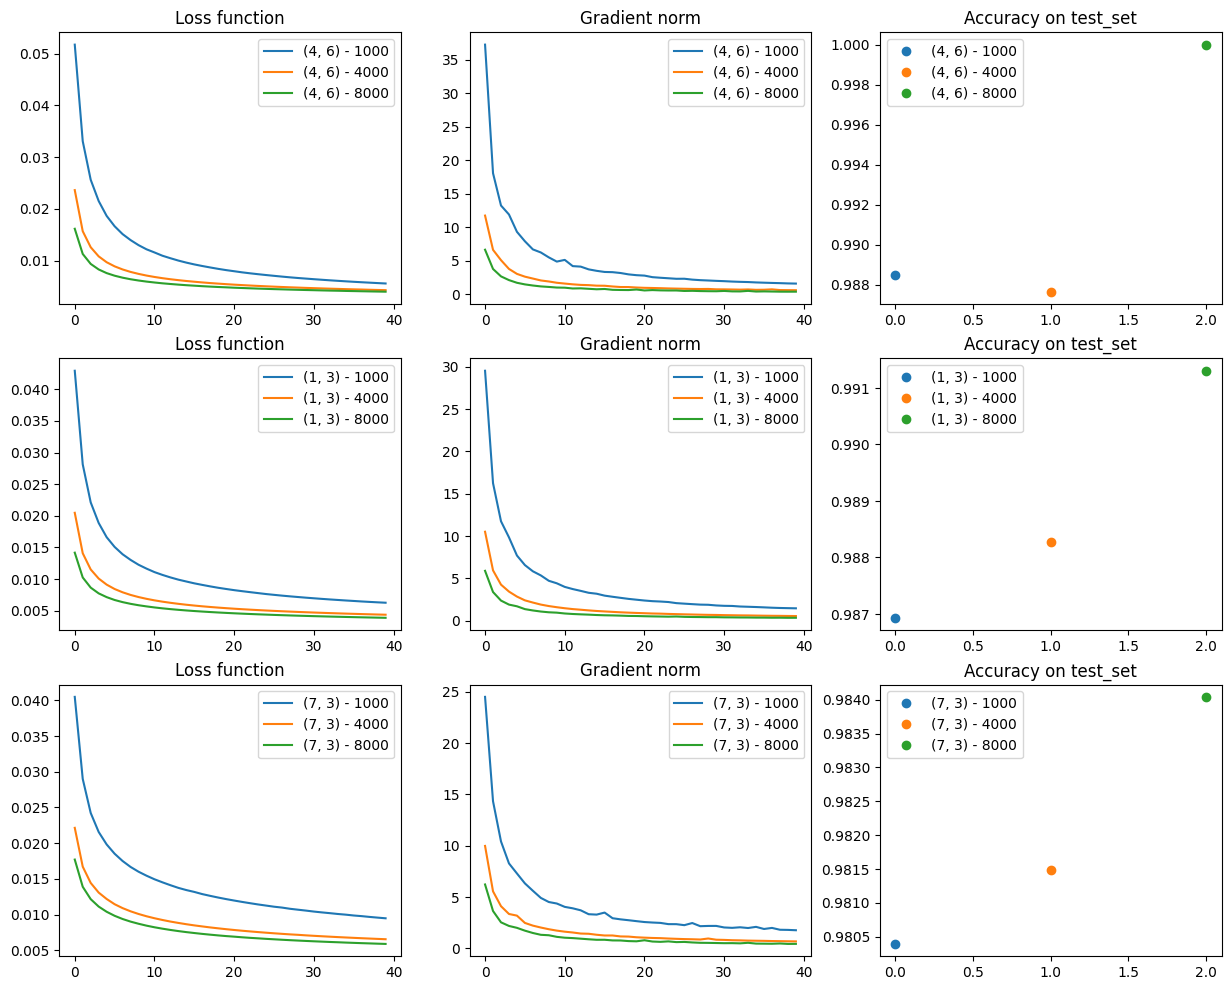

In [41]:
_, axs = plt.subplots(3, 3, figsize=(15, 12))

for row, (key, value_list_inner) in enumerate(value_list.items()):
    for col, value in enumerate(value_list_inner):
        X_train, Y_train, X_test, Y_test = get_data(data, value["digits"], value["N_train"])
        w, loss_val, grads_val, err_val = SGD(loss_func, grad_func, model, np.ones(d)*1e-5, (X_train, Y_train), 400, 40)
        accuracy = np.mean([predict(w[-1], X_test, model) == Y_test])

        axs[row, 0].plot(loss_val, label=f"{key} - {value['legend']}")
        axs[row, 1].plot(err_val, label=f"{key} - {value['legend']}")
        axs[row, 2].plot(col, accuracy, "o", label=f"{key} - {value['legend']}")

# Aggiungi etichette ai grafici
for row in range(3):
    axs[row, 0].set_title("Loss function")
    axs[row, 0].legend()
    axs[row, 1].set_title("Gradient norm")
    axs[row, 1].legend()
    axs[row, 2].set_title("Accuracy on test_set")
    axs[row, 2].legend()

plt.show()


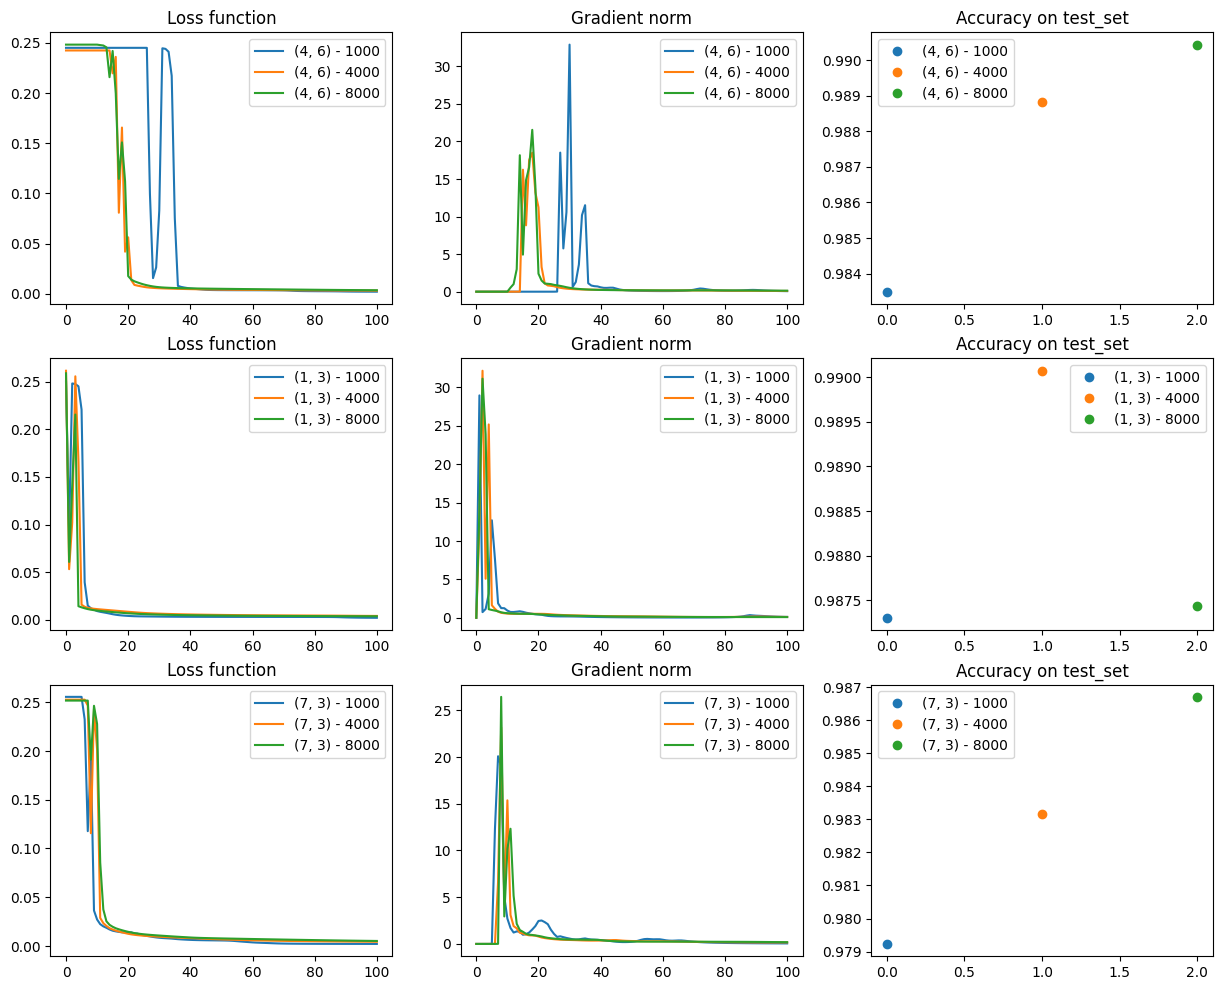

In [42]:
_, axs = plt.subplots(3, 3, figsize=(15, 12))

for row, (key, value_list_inner) in enumerate(value_list.items()):
    for col, value in enumerate(value_list_inner):
        X_train, Y_train, X_test, Y_test = get_data(data, value["digits"], value["N_train"])
        w, k, loss_val, grads_val, err_val = GD_back(loss_func, grad_func, model, np.ones(d)*1e-3, (X_train, Y_train))
        accuracy = np.mean([predict(w[-1], X_test, model) == Y_test])

        axs[row, 0].plot(loss_val, label=f"{key} - {value['legend']}")
        axs[row, 1].plot(err_val, label=f"{key} - {value['legend']}")
        axs[row, 2].plot(col, accuracy, "o", label=f"{key} - {value['legend']}")

# Aggiungi etichette ai grafici
for row in range(3):
    axs[row, 0].set_title("Loss function")
    axs[row, 0].legend()
    axs[row, 1].set_title("Gradient norm")
    axs[row, 1].legend()
    axs[row, 2].set_title("Accuracy on test_set")
    axs[row, 2].legend()

plt.show()

Stands out that he convergency speed using a bigger value for N_train is way bigger

In general using a Gradient descent algorithm is less effective then using a stochastic gradient descent.
The results point out the less accuracy of the Gradient descent method.

The behaviour of the loss function and gradient norm is heavily influenced by the backtracking algorithm with its bouncing

Obviously more N_train is equal to a more accurated model

The peculiar cases when the accuracy decreases aumenting the N_train could point out the presence of overfitting

### K = 3 classes

In [43]:
def get_data_from_index(X, Y, indeces):
    d1 = indeces[0]
    d2 = indeces[1]
    d3 = indeces[2]
    idx = np.where((Y[:]==d1) | (Y[:]==d2) | (Y[:]==d3))[0]

    X = X[:, idx]  
    Y = Y[idx]
    return X, Y

In [44]:
def one_hot_encoding(y, indeces):
        one_hot_encoded_y = np.zeros(len(indeces))
        idx = indeces.index(y)
        one_hot_encoded_y[idx]+=1
        return one_hot_encoded_y


In [45]:
def get_data(data, indeces, N_train):
    data_copied = np.array(data)
    X = data_copied[:, 1:]
    X = X.T
    Y = data_copied[:, 0]
    d, N = X.shape
    X_hat = np.concatenate((np.ones((1,N)), X), axis=0) #for logistic

    X_hat, Y = get_data_from_index(X_hat, Y, indeces)
    _, N = X_hat.shape

    (X_train, Y_train), (X_test, Y_test) = train_test_split(X_hat, Y, N_train) #X_hat for logistic
    
    Y_train = np.array(list(map(lambda y: one_hot_encoding(y, indeces), Y_train)))

    Y_test = np.array(list(map(lambda y: one_hot_encoding(y, indeces), Y_test)))
    
    return X_train, Y_train, X_test, Y_test

In [46]:
indeces = [0, 6, 9]
N_train = 4000

X_train, Y_train, X_test, Y_test = get_data(data, indeces, N_train)

In [47]:
N, k = Y_test.shape
print(N, k)

8457 3


In [48]:
# to assign probabilities to each class
# as y is now a Nx3 matrix, the weights have dimension (d+1)x3 matrix
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z)) 

def model_softmax(w, x_hat):
    return softmax(x_hat.T @ w)

def loss_func_softmax(w, x_hat, y, model):
    return np.linalg.norm(model(w, x_hat)-y, ord=2)/(2*y.shape[0]) 

To find the gradient of MSE of softmax with respect to the d*k matrix of weights W you have to follow these steps:

$D_W(\frac{1}{2} ||g(x^TW)-y||^2) = D_W(g(x^TW)) * (g(x^TW)-y)$

$D_W(g(x^TW)) = \frac{dg(z)}{dz} * D_W(x^TW)$

$D_W(x^TW) = x^T$

$\frac{dg(z)}{dz} $, where g is the softmax function, is $z_i(\delta_{ij}-z_j)$, a $k*k$ matrix

putting all together, $D_W(g(x^TW)) = z_i(\delta_{ij}-z_j) * (g(x^TW)-y) * x^Tl$ 

$\delta_{ij}$ is the knonecker symbol -> i=j is 1; 0 otherwise

$z_i$ and and $z_j$ are the i-ith and j-ih softmax

Dimensionally it is $(k*k) (k*1) (1*d)$, that results in a $(k*d)$ result, same dimension as the W matrix when you transpose it

<img alt="" class="bg lx oz c" width="554" height="98" loading="lazy" role="presentation" src="https://miro.medium.com/v2/resize:fit:693/1*SWfgFQLDIPXDf1C6CHmr8A.png">

In [49]:
def grad_func_softmax(w, x_hat, y, model):
    
    s = model(w, x_hat) 
    softmax_grad = np.diagflat(s) - s @ s.T  # s1 * 1 - s1 * s1 on the diagonal, -s1-s2 otherwise

    tmp = softmax_grad @ (s-y).T
    tmp = np.expand_dims(tmp, axis=1)
    x_hat = np.expand_dims(x_hat, axis=1)
    return (tmp @ x_hat.T).T


In [50]:
np.random.seed(42)

def SGD_softmax(loss_func, grad_func, model, w0, data, batch_size, n_epochs):

    X, Y = data
    alpha = 1e-5
    w = [w0]
    loss_val = []
    grads_val = []
    err_val = []

    for n in range(n_epochs):
        indeces = np.arange(len(Y))
        np.random.shuffle(indeces)
        X = X[:,indeces]
        Y = Y[indeces]

        for i in range(0, len(Y), batch_size):
            batch_X = X[:,i:i+batch_size]
            batch_Y = Y[i:i+batch_size]

            gradient_update = np.zeros_like(w0)
            # gradient update for every datapoint and its label 
            for x, y in zip(batch_X.T, batch_Y):
                gradient_update += grad_func(w[-1], x, y, model)
            
            # after calcultating the full gradient update
            w_n = w[-1] - alpha*gradient_update/batch_size
            w.append(w_n)

        loss_val.append(np.mean([loss_func(w[-1], x, y, model) for x, y in zip(X.T, Y)]))
        grads_val.append(np.mean([grad_func(w[-1], x, y, model) for x, y in zip(X.T, Y)]))
        err_val.append(np.linalg.norm(grads_val[-1])**2)

    return w, loss_val, grads_val, err_val

In [51]:
w, loss_val, grads_val, err_val = SGD_softmax(loss_func_softmax, grad_func_softmax, model_softmax, np.ones((d, k))*1e-5, (X_train, Y_train), 400, 30)

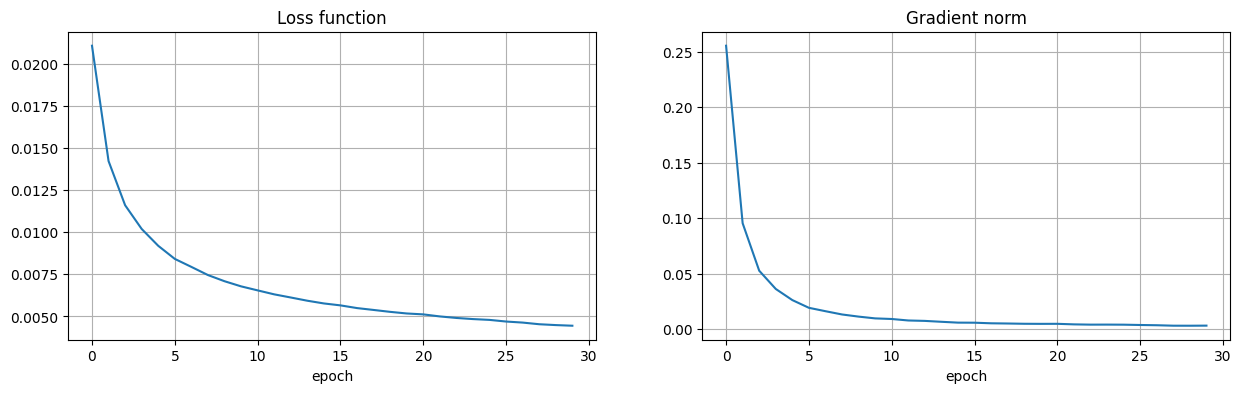

In [52]:
_, axs = plt.subplots(1, 2, figsize=(15, 4))

axs[0].plot(loss_val)
axs[0].set_title("Loss function")
axs[0].set_xlabel("epoch")
axs[0].grid()

axs[1].plot(err_val)
axs[1].set_title("Gradient norm")
axs[1].set_xlabel("epoch")
axs[1].grid()

plt.show()

In [53]:
def predict(w, x, model):
    results = model(w, x)
    return np.argmax(results)

predicted_labels = [predict(w[-1], x, model_softmax) for x in X_test.T]
true_labels = np.argmax(Y_test, axis=1)

# accuracy multilinear regression
acc_ML = np.mean([predicted_labels == true_labels])*100
print("Accuracy of multilinear regression: {:.2f}%".format(acc_ML))

Accuracy of multilinear regression: 98.60%


### Comparison with PCA

In [54]:
Y = np.array(data['label'])
X = np.array(data.drop('label', axis=1).T)
d, N = X.shape

In [55]:
def get_data_from_index(X, Y, indeces):
    d1 = indeces[0]
    d2 = indeces[1]
    d3 = indeces[2]
    idx = np.where((Y[:]==d1) | (Y[:]==d2) | (Y[:]==d3))[0]

    X = X[:, idx]  
    Y = Y[idx]
    return X, Y

X, Y = get_data_from_index(X, Y, indeces)

In [56]:
def train_test_split(X, Y, Ntrain):
    N = X.shape[1]

    idx = np.arange(N)
    np.random.shuffle(idx)

    train_idx = idx[:Ntrain]
    test_idx = idx[Ntrain:]

    Xtrain = X[:, train_idx]
    Ytrain = Y[train_idx]

    Xtest = X[:, test_idx]
    Ytest = Y[test_idx]

    return Xtrain, Ytrain, Xtest, Ytest


Xtrain, Ytrain, Xtest, Ytest = train_test_split(X, Y, 4000)

print("Xtrain shape = {}\nXtest shape = {}".format(Xtrain.shape, Xtest.shape))
print("Ytrain shape = {}\nYtest shape = {}".format(Ytrain.shape, Ytest.shape))

Xtrain shape = (784, 4000)
Xtest shape = (784, 8457)
Ytrain shape = (4000,)
Ytest shape = (8457,)


In [57]:
def centroid(X):
    return np.mean(X, axis=1, keepdims=True) 


def PCA(X, k):
    c =  centroid(X)
    Xc = X - c 
    U, S, VT = np.linalg.svd(Xc, full_matrices=False)
    U_k = U[:, :k]
    return U_k.T

def classify_sample(sample, centroids, classes):
    distances = [np.linalg.norm(sample-c) for c in centroids]
    return classes[np.argmin(distances)]

def get_accuracy(Ztrain, Ztest, Ytrain, Ytest):
    classes = np.unique(Ytrain)
    centroids = []
    for i in classes:
        cluster = Ztrain[:, Ytrain==i]
        centroids.append(np.mean(cluster, axis=1))

    correct_predictions = 0

    for sample, c in zip(Ztest.T, Ytest):
        predicted_class = classify_sample(sample, centroids, classes)
        if predicted_class == c:
            correct_predictions += 1

    return correct_predictions / len(Ytest) 

k = 2
Xc_train = Xtrain - centroid(Xtrain)
Z_train = PCA(Xtrain, k) @ Xc_train

Xc_test = Xtest - centroid(Xtest)
Z_test = PCA(Xtrain, k) @ Xc_test 

acc_PCA = get_accuracy(Z_train, Z_test, Ytrain,Ytest)*100

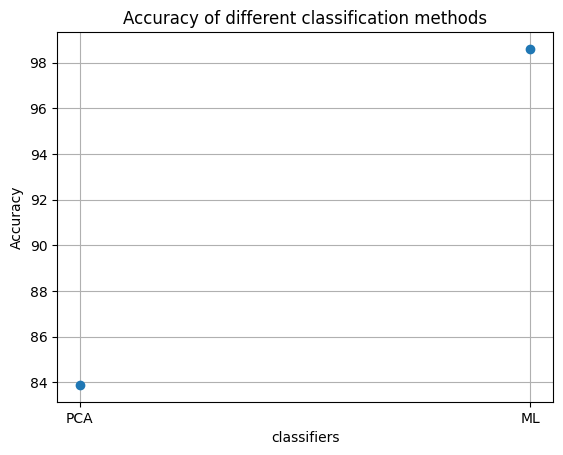

In [58]:
plt.plot(range(2), [acc_PCA, acc_ML], "o")
plt.grid()
plt.xticks(range(2), ["PCA", "ML"])
plt.ylabel("Accuracy")
plt.xlabel("classifiers")
plt.title("Accuracy of different classification methods")
plt.show()

For Ntrain = 4000 the accuracy of PCA is very small compared to the accuracy of Multilinear logistic regression